## Stochastic simulation algorithm


In [3]:
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import poisson

## Exponential distribution


(array([0.71936307, 0.38184878, 0.16875714, 0.08580872, 0.02717276,
        0.02145218, 0.01430145, 0.00858087, 0.00143015, 0.00143015]),
 array([3.66084015e-05, 6.99266279e-01, 1.39849595e+00, 2.09772562e+00,
        2.79695529e+00, 3.49618496e+00, 4.19541463e+00, 4.89464430e+00,
        5.59387397e+00, 6.29310364e+00, 6.99233331e+00]),
 <BarContainer object of 10 artists>)

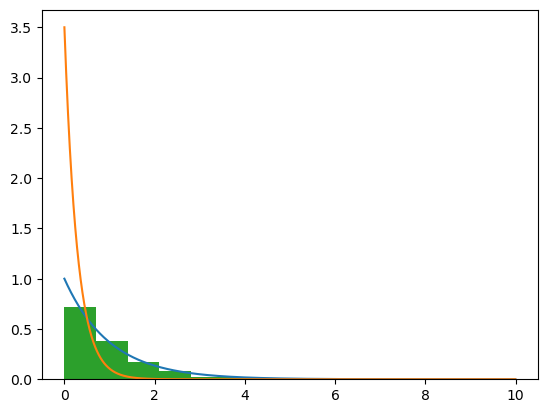

In [86]:
m = np.arange(0, 10, 0.01)
plt.plot(m, expon.pdf(m))  # Exponential distribution with rate 1
plt.plot(m, expon.pdf(m, 0.0, 1/3.5))  # Exponential distribution with rate 3.5
plt.hist(-np.log(rand(1000)), density=True)

## Simulation algorithm


In [80]:
k0 = 3.5  # production
k1 = 1.0  # degradation
stoichiometry = [1, -1]


def propensities(x):
    return [k0, k1*x]


def reaction_times(x):
    a = propensities(x)
    aInv = [1/s if s > 0 else np.inf for s in a]
    return -np.log(rand(2)) * aInv


def ssa_step(x, tIn, tOut):
    # take the state x at time tIn and return the state at time tOut
    t = tIn

    while t < tOut:
        rt = reaction_times(x)
        idx = np.argmin(rt)
        tau = np.min(rt)
        # tau = rt[idx]

        x += stoichiometry[idx]
        t += tau
    return x

In [91]:
dt = 0.5  # time-step
x = 0    # initial state
t = 0.0

mrna = [x]
time = [t]
for i in range(10000):
    x = ssa_step(x, t, t+dt)
    t += dt
    mrna.append(x)
    time.append(t)

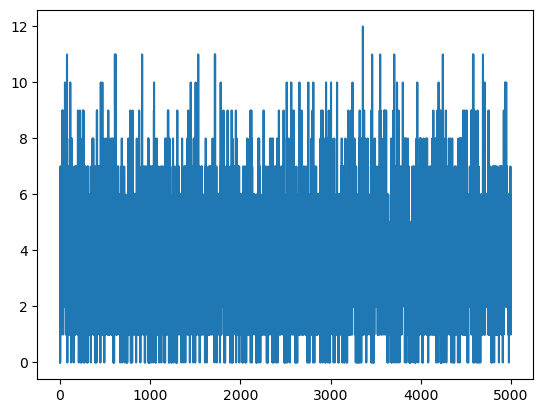

In [92]:
plt.plot(time, mrna)

## Steady state distribution


In [93]:
mu = k0 / k1
poisson.stats(mu)

(3.5, 3.5)

In [94]:
np.mean(mrna), np.var(mrna)

(3.671232876712329, 3.473154054457568)

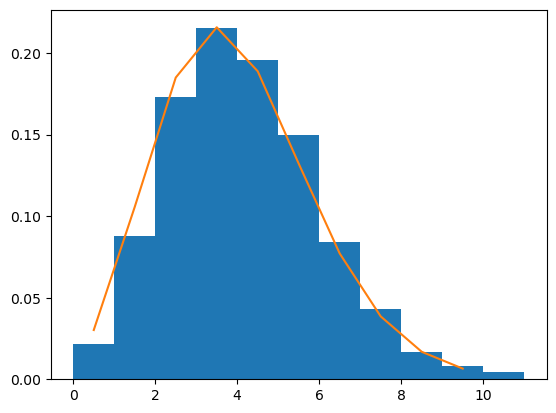

In [95]:
plt.figure()
plt.hist(mrna, bins=range(0, max(mrna)), density=True)
ar = np.arange(0, 10)
plt.plot(ar + 0.5, poisson.pmf(ar, mu))